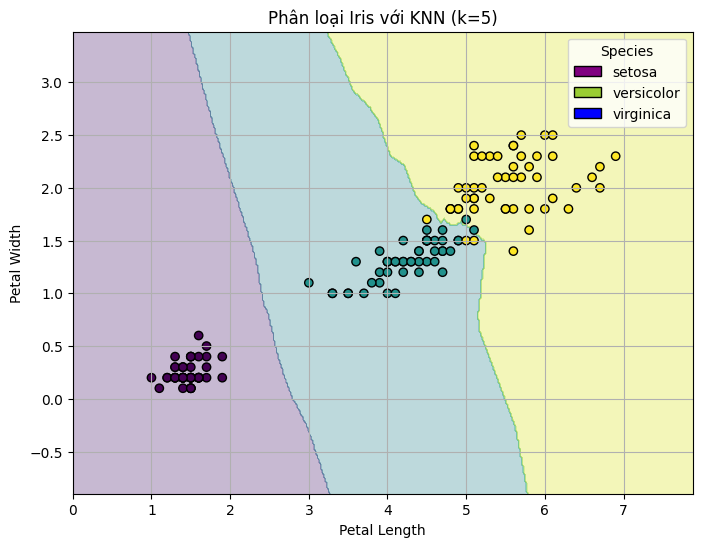

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.patches import Patch

# 1. Đọc dữ liệu từ file
df = pd.read_csv('iris.csv')

# 2. Tách đặc trưng và nhãn
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# 3. Mã hóa nhãn thành số
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Khởi tạo và huấn luyện KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# =============================
# 📈 Trực quan hóa vùng phân loại (2 đặc trưng)
# =============================

# Dùng chỉ 2 đặc trưng để trực quan
X_vis = df[['petal_length', 'petal_width']].values
y_vis = y_encoded

# Huấn luyện KNN với 2 đặc trưng
knn_vis = KNeighborsClassifier(n_neighbors=k)
knn_vis.fit(X_vis, y_vis)

# Tạo lưới điểm để vẽ vùng phân loại
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Dự đoán trên toàn bộ lưới
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='viridis', edgecolor='k')

# Tạo legend thủ công
colors = ['purple', 'yellowgreen', 'blue']
labels = encoder.classes_
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_elements, title='Species')

# Nhãn trục và tiêu đề
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title(f'Phân loại Iris với KNN (k={k})')
plt.grid(True)
plt.show()
